In [4]:
import rioxarray
red = rioxarray.open_rasterio("data/sentinel2/red.tif", chunks=(1, 4000, 4000))


In [5]:
#Exercise 1
import rasterio
with rasterio.open("data/sentinel2/red.tif") as r:
    if r.is_tiled:
        print(f"Chunk size: {r.block_shapes}")

#The number of resulting chunks and how large they are can be important
#Chunks of approximately 100 MB are optimal
#Chunk sizes of 6144  result in chunks each 72 MB large
red = rioxarray.open_rasterio("data/sentinel2/red.tif", chunks=(1, 6144, 6144))


Chunk size: [(1024, 1024)]


In [6]:
red = rioxarray.open_rasterio('data/sentinel2/red.tif', masked=True)
nir = rioxarray.open_rasterio('data/sentinel2/nir.tif', masked=True)

In [8]:
%%time
#Computing ndvi and returning how much time it takes to run
ndvi = (nir - red)/(nir + red)

CPU times: user 1.25 s, sys: 737 ms, total: 1.98 s
Wall time: 2.02 s


In [9]:
red_dask = rioxarray.open_rasterio('data/sentinel2/red.tif', masked=True, lock=False, chunks=(1, 6144, 6144))
nir_dask = rioxarray.open_rasterio('data/sentinel2/nir.tif', masked=True, lock=False, chunks=(1, 6144, 6144))

In [10]:
%%time
#Testing with smaller chunks
ndvi_dask = (nir_dask - red_dask)/(nir_dask + red_dask)

CPU times: user 4.87 ms, sys: 191 μs, total: 5.07 ms
Wall time: 4.52 ms


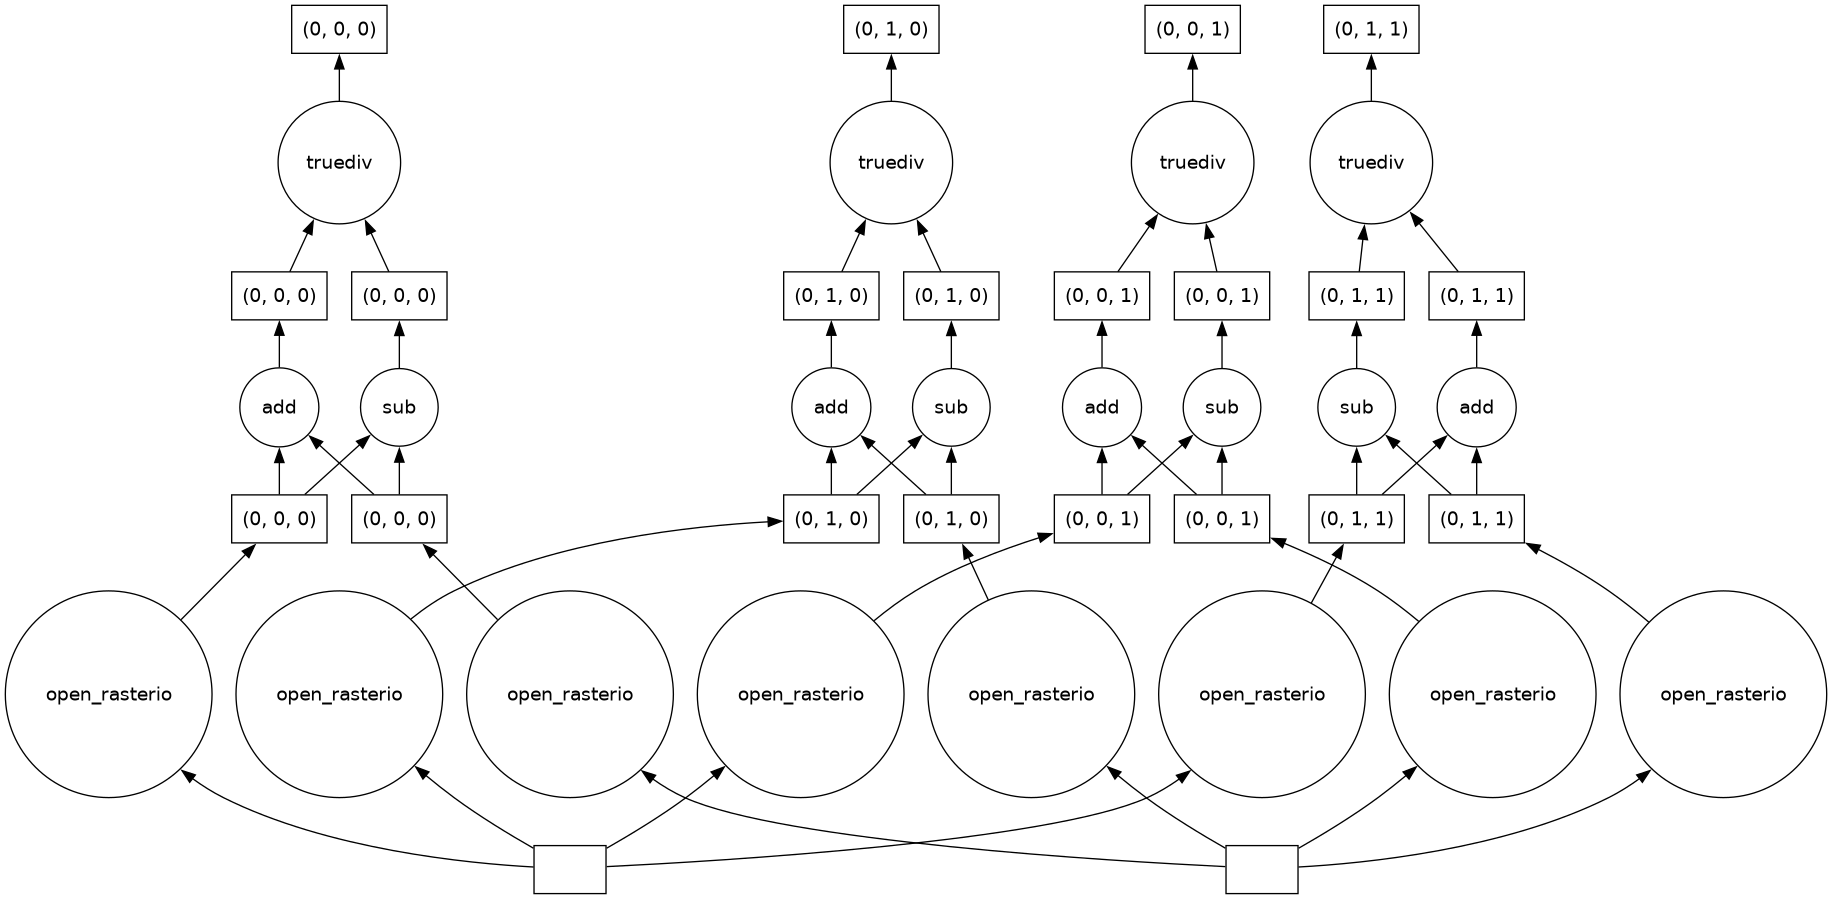

In [11]:
import dask
dask.visualize(ndvi_dask)

In [12]:
%%time
ndvi_dask = ndvi_dask.persist(scheduler="threads", num_workers=4)

CPU times: user 1.32 s, sys: 639 ms, total: 1.96 s
Wall time: 680 ms


In [13]:
from threading import Lock
ndvi_dask.rio.to_raster('ndvi.tif', tiled=True, lock=Lock())